# PROJETO 2 
## Aluno 1: João Pedro Ramos Belmiro - 9791198  
## Aluno 2: Matheus Aparecido do Carmo Alves - 9791114  

### <a id="lista">Exercícios</a> 

[Exercício 01](#1)
[Exercício 02](#2)
[Exercício 03](#3)

## Imports

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random 
import pandas as pd

np.random.seed(101)

## <a id="1">EXERCÍCIO 1</a>

## Parte 1
Primeiramente, iremos carregar as redes necessárias para esta primeira parte do projeto. 

Serão geradas 5 redes com 500 nós e grau médio 4, sendo elas:

<ul>
    <li>Erdös-Rényi	network;</li>
    <li>Barabási-Albert	scale-free network;</li>
    <li>Small-world	networks for p=0.001, p=0.01 and p=0.1.</li>
</ul>

In [2]:
# 1. Setting networks parameters
N = 500             # number of nodes
av_degree = 4       # average degree
p = av_degree/(N-1) # probability

# 2. Building Networks
erdos = nx.gnp_random_graph(N, p, seed=None, directed=False)
bara = nx.barabasi_albert_graph(N, int(av_degree/2))
sw001 = nx.watts_strogatz_graph(N, int(av_degree/2), 0.001, seed=None)
sw01 = nx.watts_strogatz_graph(N, int(av_degree/2), 0.01, seed=None)
sw1 = nx.watts_strogatz_graph(N, int(av_degree/2), 0.1, seed=None)

Com as redes carregadas, iremos testar a robustez das redes contra falha e ataque.

### a) Failures

Primeiramente, vamos definir as funções para realizar os cálculos necessários.

In [21]:
def failures(H, times=10):
    mean_S = []
    mean_vn = []
    for i in range(0, times):
        G = H.copy()
        N0 = len(G)
        vn = []
        S = []
        n = 0 #number of nodes removed
        while(len(G.nodes()) > int(0.01*N0)):
            node = random.choice(list(G.nodes())) #select the node on the largest component
            G.remove_node(node) 
            Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
            Glc=Gcc[0] 
            S.append(len(Glc)/N0) #store the size of the largest component
            n = n + 1
            vn.append(n/N0)
        mean_S.append(S)
        mean_vn.append(vn)
        
    df_s = pd.DataFrame(mean_S)
    df_vn = pd.DataFrame(mean_vn)
    
    mean_S = []
    mean_vn = []
    for i in range(0, df_s.shape[1]):
        mean_S.append(df_s[i].mean())
        mean_vn.append(df_vn[i].mean())
    return mean_S, mean_vn

Agora vamos calcular as falhas associadas a cada rede.

In [4]:
S_erdos, vn_erdos = failures(erdos)
S_bara, vn_bara = failures(bara)
S_sw001, vn_sw001 = failures(sw001)
S_sw01, vn_sw01 = failures(sw01)
S_sw1, vn_sw1 = failures(sw1)

Gerando os gráficos dos resultados obtidos, temos:

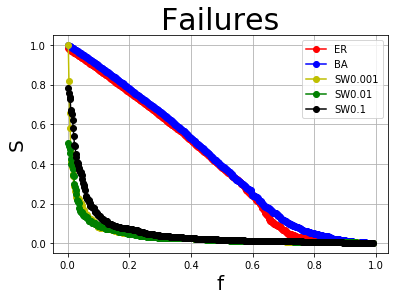

In [5]:
plt.figure()

plt.plot(vn_erdos,S_erdos,'-or', label='ER')
plt.plot(vn_bara,S_bara,'-ob', label='BA')
plt.plot(vn_sw001,S_sw001,'-oy', label='SW0.001')
plt.plot(vn_sw01,S_sw01,'-og', label='SW0.01')
plt.plot(vn_sw1,S_sw1,'-ok', label='SW0.1')

plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Failures", fontsize=30)
plt.grid(True)
plt.show(); 

### b) Attacks

Primeiramente, vamos definir as funções para realizar os cálculos necessários.

In [20]:
def most_connected(G): # This function is used to find the most connected node
    maxk = 0
    node = 0
    for i in G.nodes():
        if(G.degree(i) >= maxk):
            maxk = G.degree(i)
            node = i
    return node 

def attacks(H, times=10):
    mean_S = []
    mean_vn = []
    for i in range(0, times):
        G = H.copy()    
        N0 = len(G)
        vn = []
        S = []
        n = 0 #number of nodes removed
        while(len(G.nodes()) > int(0.01*N0)):
            node = most_connected(G) #select the most connected node on the largest component   
            G.remove_node(node) 
            Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
            Glc=Gcc[0] 
            S.append(len(Glc)/N0) #store the size of the largest component
            n = n + 1
            vn.append(n/N0)
        mean_S.append(S)
        mean_vn.append(vn)
        
    df_s = pd.DataFrame(mean_S)
    df_vn = pd.DataFrame(mean_vn)
    
    mean_S = []
    mean_vn = []
    for i in range(0, df_s.shape[1]):
        mean_S.append(df_s[i].mean())
        mean_vn.append(df_vn[i].mean())
    return mean_S, mean_vn

Agora vamos calcular os ataques associadas a cada rede.

In [8]:
S_erdos, vn_erdos = attacks(erdos)
S_bara, vn_bara = attacks(bara)
S_sw001, vn_sw001 = attacks(sw001)
S_sw01, vn_sw01 = attacks(sw01)
S_sw1, vn_sw1 = attacks(sw1)

Gerando os gráficos dos resultados obtidos, temos:

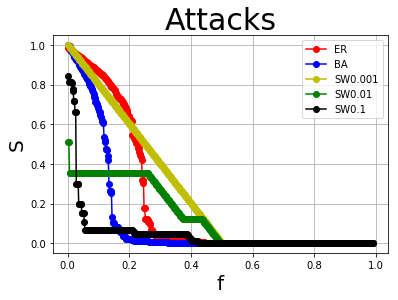

In [9]:
plt.figure()
plt.plot(vn_erdos,S_erdos,'-or', label='ER')
plt.plot(vn_bara,S_bara,'-ob', label='BA')
plt.plot(vn_sw001,S_sw001,'-oy', label='SW0.001')
plt.plot(vn_sw01,S_sw01,'-og', label='SW0.01')
plt.plot(vn_sw1,S_sw1,'-ok', label='SW0.1')
plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Attacks", fontsize=30)
plt.grid(True)
plt.show(); 

## Parte 2 

Primeiramente, iremos carregar as 3 redes necessárias para esta primeira parte do projeto, sendo elas:

<ul>
    <li>Human Protein network;</li>
    <li>C. elegans protein network;</li>
    <li>Mosquito interaction network (A. aegypti).</li>
</ul>

In [4]:
human = nx.Graph()
human = nx.read_weighted_edgelist('Networks/human_proteins', nodetype=int, comments='%')
human = human.to_undirected()
human.remove_edges_from(nx.selfloop_edges(human))

elegans07 = nx.Graph()
elegans07 = nx.read_edgelist("Networks/wi2007.txt", nodetype=str)
elegans07 = elegans07.to_undirected()
elegans07 = nx.convert_node_labels_to_integers(elegans07, first_label=0)
elegans07.remove_edges_from(nx.selfloop_edges(elegans07))

df = pd.read_csv('Networks/mosquito.csv')
mosquito = nx.from_pandas_edgelist(df, source='Gene1', target='Gene2', edge_attr=None)
mosquito = mosquito.to_undirected()

vamos agora realizar os ataques e falhas nas redes

In [ ]:
f_S_human, f_vn_human = failures(human)
a_S_human, a_vn_human = attacks(human)

In [ ]:
f_S_elegans07, f_vn_elegans07 = failures(elegans07)
a_S_elegans07, a_vn_elegans07 = attacks(elegans07)

In [ ]:
f_S_mosquito, f_vn_mosquito = failures(mosquito)
a_S_mosquito, a_vn_mosquito = attacks(mosquito)

Construindo o gráfico de resultados, temos:

In [ ]:
plt.figure()
plt.plot(f_vn_human,f_S_human,'-or', label='Human')
plt.plot(f_vn_elegans07,f_S_elegans07,'-ob', label='C.Elegans')
plt.plot(f_vn_mosquito,f_S_mosquito,'-oy', label='Mosquito')
plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Failures", fontsize=30)
plt.grid(True)
plt.show(); 

plt.figure()
plt.plot(a_vn_human,a_S_human,'-or', label='Human')
plt.plot(a_vn_elegans07,a_S_elegans07,'-ob', label='C.Elegans')
plt.plot(a_vn_mosquito,a_S_mosquito,'-oy', label='Mosquito')
plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Attacks", fontsize=30)
plt.grid(True)
plt.show(); 

## Parte 3

In [ ]:
# 1. Defining the parameters
N = 400
tau1 = 3
tau2 = 1.5
k = 16
minc = 32
maxc = 50

# 2. Running Santo Fortunato
for mu in [0.1,0.3,0.5]:
    # a. generating the graph
    G = nx.algorithms.community.LFR_benchmark_graph(n = N, tau1 = tau1,
        tau2 = tau2, mu = mu, min_degree = k,
        max_degree = k, min_community=minc,
        max_community = maxc, seed = 10)
    
    # b. calculating fail and attack
    fail, Sf = failures(G)
    attack, Sa = attacks(G)
    
    # c. plotting
    plt.figure()
    plt.plot(fail,Sf,'-or', label='Failures')
    plt.plot(attack,Sa,'-ob', label='Attacks')
    plt.xlabel("f", fontsize=20)
    plt.ylabel("S", fontsize=20)
    plt.title('Graph mu='+str(mu))
    plt.legend()
    plt.grid(True)
    plt.show();

[Voltar para o topo](#lista)

## <a id="2">EXERCÍCIO 2</a>
### a) SIS

Primeiramente, vamos definir o método para implementar a função SIS.

In [14]:
def SIS(G, mu=1, Tmax = 20):    
    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in np.arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIS dynamics
        av_rho = np.zeros(Tmax)
        for seed_node in G.nodes():
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in np.arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                infected = find(vector_states,1) # list of infected nodes
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            vector_states[j] = 1
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 0
                ninfected = len(find(vector_states,1))
                vrho.append(ninfected/N)
            for x in np.arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
        av_rho = av_rho/len(G.nodes())
        rhoI.append(np.mean(av_rho[np.arange(int(0.8*Tmax), Tmax)]))
        vlbda.append(lbd)
    return vlbda, rhoI

Serão geradas 5 redes com 500 nós e grau médio 8.

In [15]:
# 1. Setting networks parameters
N = 500              # number of nodes
av_degree = 8        # average degree
p = av_degree/(N-1)  # probability
m = int(av_degree/2) # probability for edge creation

# 2. Building Networks
erdos = nx.gnp_random_graph(N, p, seed=None, directed=False)
bara = nx.barabasi_albert_graph(N, m)
sw001 = nx.watts_strogatz_graph(N, m, 0.001, seed=None)
sw01 = nx.watts_strogatz_graph(N, m, 0.01, seed=None)
sw1 = nx.watts_strogatz_graph(N, m, 0.1, seed=None)

Definiremos agora os métodos para construir os gráficos SIS.

In [16]:
def find(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes():
        M = M + G.degree(i)**m
    M = M/N
    return M

def plot_SIS(G, name):
    lbda, rho  = SIS(G)
    plt.figure()
    plt.plot(lbda, rho, 'ro--', label='Simulation')
    plt.xlabel("lambda", fontsize=15)
    plt.ylabel("Fraction of infected nodes", fontsize=15)
    lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
    plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
    plt.legend()
    plt.title(name, fontsize=30)
    plt.grid(True)
    plt.show(True) 

Agora, serão construídos os gráficos de propagação de epidemias para cada rede base gerada.

In [17]:
plot_SIS(erdos, "Erdös-Rényi")
plot_SIS(bara, "Barabási-Albert")
plot_SIS(sw001, "Small-World - p=0.001")
plot_SIS(sw01, "Small-World - p=0.01")
plot_SIS(sw1, "Small-World - p=0.1")

KeyboardInterrupt: 

### b) SIR

Primeiramente, vamos definir o método para implementar a função SIR.

In [1]:
def SIR(G, mu=1, Tmax = 20):    
    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIR dynamics
        av_rho = np.zeros(Tmax)
        for seed_node in G.nodes():
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                infected = find(vector_states,1) # list of infected nodes
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            if(vector_states[j] != 2): # verify if the node is not recovered
                                vector_states[j] = 1
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 2
                ninfected = len(find(vector_states,1))
                vrho.append(ninfected/N)
            for x in arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
        av_rho = av_rho/len(G.nodes())
        rhoI.append(mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
        vlbda.append(lbd)
    return vlbda, rhoI

Definiremos agora os métodos para construir os gráficos SIR.

In [7]:
def plot_SIR(G, name):
    lbda, rho  = SIR(G)
    plt.figure()
    plt.plot(lbda, rho, 'ro--', label='Simulation')
    plt.xlabel("lambda", fontsize=15)
    plt.ylabel("Fraction of infected nodes", fontsize=15)
    lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
    plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
    plt.legend()
    plt.title(name, fontsize=30)
    plt.grid(True)
    plt.show(True) 

Agora, serão construídos os gráficos de propagação de epidemias para cada rede base gerada.

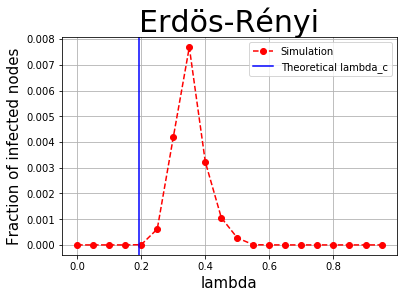

In [11]:
plot_SIR(erdos, "Erdös-Rényi")
plot_SIR(bara, "Barabási-Albert")
plot_SIR(sw001, "Small-World - p=0.001")
plot_SIR(sw01, "Small-World - p=0.01")
plot_SIR(sw1, "Small-World - p=0.1")

[Voltar para o topo](#lista)

## <a id="3">EXERCÍCIO 3</a>

Carregando as redes base para desenvolvimento do exercício.

In [2]:
eroad = nx.Graph()
eroad = nx.read_edgelist('Networks/euroroad.txt', nodetype=int, comments='%')
eroad = eroad.to_undirected()
eroad.remove_edges_from(nx.selfloop_edges(eroad))

hams = nx.Graph()
hams = nx.read_edgelist('Networks/hamster', nodetype=int, comments='%')
hams = hams.to_undirected()
hams.remove_edges_from(nx.selfloop_edges(hams))

elegans = nx.MultiGraph()
elegans = nx.nx.read_gml('Networks/celegansneural.gml')
elegans = nx.Graph(elegans)
elegans = elegans.to_undirected()
elegans = nx.convert_node_labels_to_integers(elegans, first_label=0)
elegans.remove_edges_from(nx.selfloop_edges(elegans))

airport = nx.Graph()
airport = nx.read_edgelist("Networks/usairport.txt", nodetype=int, data=(('weight',int),))
airport = airport.to_undirected()
airport.remove_edges_from(nx.selfloop_edges(airport))

[Voltar para o topo](#lista)